In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad


In [ ]:
# Parameters for bean type A
mu_A = 5
sigma_A = 2

# Parameters for bean type B
mu_B = 4
sigma_B = 1.4

In [ ]:
# Define the integrand function
def form_norm(x, mu, sigma):
    exponent = np.exp(-((x - mu) ** 2 / (2 * sigma ** 2)))
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * exponent

# Define functions to compute the conditional probabilities
def probability_A_given_B(T):
    prob_A_given_B, _ = quad(form_norm, T, np.inf, args=(mu_A, sigma_A))
    prob_B_given_B, _ = quad(form_norm, T, np.inf, args=(mu_B, sigma_B))
    return prob_A_given_B / (prob_A_given_B + prob_B_given_B)

def probability_B_given_A(T):
    prob_B_given_A, _ = quad(form_norm, -np.inf, T, args=(mu_B, sigma_B))
    prob_A_given_A, _ = quad(form_norm, -np.inf, T, args=(mu_A, sigma_A))
    return prob_B_given_A / (prob_B_given_A + prob_A_given_A)

In [ ]:
# Generate a range of weight thresholds T
weight = np.linspace(1, 8, 1000)

# Compute the conditional probabilities for each value of T
prob_A_given_B_values = np.array([probability_A_given_B(T) for T in weight])
prob_B_given_A_values = np.array([probability_B_given_A(T) for T in weight])



In [ ]:
# Calculate the Bayes error probability as the average of the conditional probabilities
bayes_error_values = 1 - (prob_A_given_B_values + prob_B_given_A_values) / 2

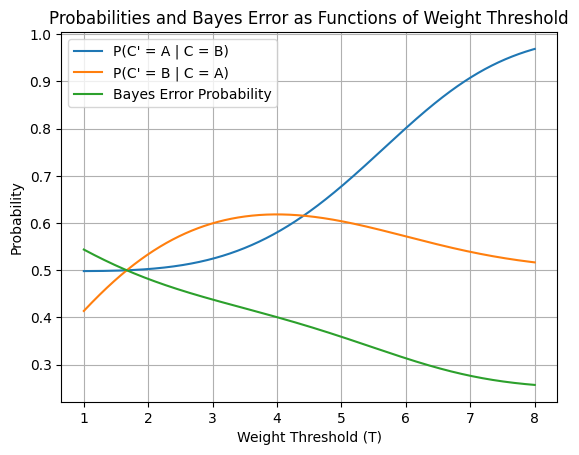

In [ ]:
# Plot the probabilities and Bayes error as functions of the weight threshold T
plt.plot(weight, prob_A_given_B_values, label='P(C\' = A | C = B)')
plt.plot(weight, prob_B_given_A_values, label='P(C\' = B | C = A)')
plt.plot(weight, bayes_error_values, label='Bayes Error Probability')
plt.xlabel('Weight Threshold (T)')
plt.ylabel('Probability')
plt.title('Probabilities and Bayes Error as Functions of Weight Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Set seed for reproducibility
np.random.seed(100)

# Number of data points for each bean type
n_points = 5000

# Simulate data points for bean type A and bean type B
data_A = mu_A + sigma_A * np.random.randn(n_points)
data_B = mu_B + sigma_B * np.random.randn(n_points)

# Generate 1,000 values of T between 1 and 8
T_values = np.linspace(1, 8, 1000)


# Compute the missclassification rate for each value of T
missclassification_rate = []
for T in T_values:
    prob_A_given_B = probability_A_given_B(T)
    prob_B_given_A = probability_B_given_A(T)
    missclassification_rate.append(1 - (prob_A_given_B + prob_B_given_A) / 2)

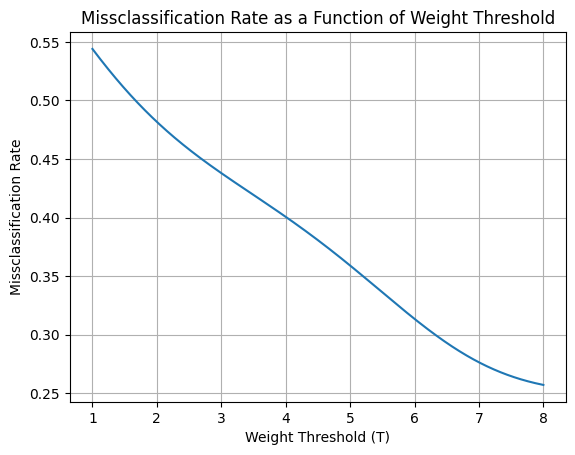

In [ ]:
# Plot the missclassification rate as a function of T
plt.plot(T_values, missclassification_rate)
plt.xlabel('Weight Threshold (T)')
plt.ylabel('Missclassification Rate')
plt.title('Missclassification Rate as a Function of Weight Threshold')
plt.grid(True)
plt.show()